# IMPORTS

In [1]:
%matplotlib widget

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import xarray as xr
from scipy import signal
from scipy import interpolate
import pandas as pd

from pycns import CnsStream, CnsReader, get_viewer
import physio

from physio_rea_analyse import *
from custum_view import *

from configuration import *
from tools import read_events 

# Patient MF12
Monito_start: 09/09/2022 00:00

Monito_end: 13/09/2022 00:00

CSD --> NUP --> EME

In [18]:
patient_id = 'MF12'
raw_folder = data_path / patient_id
cns_reader = CnsReader(raw_folder)
cns_reader

TypeError: unsupported operand type(s) for /: 'str' and 'str'

## Streams

In [ ]:
cns_reader.streams

In [ ]:
eeg_stream = cns_reader.streams['EEG']
print(eeg_stream.channel_names)

In [ ]:
stream_names = ['ECG_II', 'CO2', 'EEG', 'ABP']
start_date = np.datetime64("2022-09-14T17:30:01")
stop_date = np.datetime64("2022-09-14T17:40:01")
srate = 100
ds = cns_reader.export_to_xarray(stream_names, start=start_date, stop=stop_date, resample=True, sample_rate=srate)

## EEG signal 

In [ ]:
#DC signal: 
chan_DC = 'ECoGA2'
dc_eeg = cns_reader.streams['EEG']
print(dc_eeg)
dc_eeg = ds['EEG'].loc[:,chan_DC].values 

#AC signal: -> Check avec Valentin comment faire
chan_AC = 'ECoGA4'
ac_eeg = ds['EEG'].loc[:,chan_AC].values
ac_eeg = iirfilt(ac_eeg, srate, 0.5, 40) 
# Filtrage à modif -> 0.5 Hz de cut-off (high-pass) / 20, 40, 50 Hz de cut-off (low-pass)
# Fonction iirfilt de Valentin   

dates = ds['EEG']['times'].values  

#Plot the signals: 2 figures, one for DC and one for AC 
fig, ax = plt.subplots(2,1, sharex = True)
ax[0].plot(dates, dc_eeg, c='m')
ax[0].set_title('DC signal', c='m')
ax[0].set_ylabel('DC (µV)')
ax[1].plot(dates, ac_eeg, c='c')
ax[1].set_title('AC signal', c='c')
ax[1].set_ylabel('AC (mV)')
plt.show()

## ABP

In [ ]:
abp = ds['ABP'].values
dates = ds['ABP']['times'].values 

plt.figure()
plt.plot(dates, abp, label='ABP', color='r')
plt.xlabel('Time')
plt.ylabel('ABP')
plt.title('ABP over Time')
plt.legend()
plt.show()

## ICP 

In [ ]:
icp = ds['ICP'].values
dates = ds['ICP']['times'].values 

plt.figure()
plt.plot(dates, icp, label='ICP', color='orange')
plt.xlabel('Time')
plt.ylabel('ICP')
plt.title('ICP over Time during CSD')
plt.legend()
plt.show()

## ECG

In [ ]:
ecg = ds['ECG_II'].values
dates = ds['ECG_II']['times'].values

plt.figure()
plt.plot(dates, ecg, label='ECG', color='b')
plt.xlabel('Time')
plt.ylabel('ECG')
plt.title('ECG during event')
plt.legend()
# Adapt the scale to correctly display the ECG between 
plt.ylim(min(ecg)-0.1, max(ecg)+0.1)
plt.show()


## Instantaneous heart rate -> CRASH

In [ ]:
# params = physio.get_ecg_parameters('human_ecg') 
# params['peak_detection']['thresh'] = 'auto'
# params['peak_clean']['min_interval_ms'] = 400

In [ ]:
# # From the ECG signal, we can extract the R peaks and the RR intervals  
# raw_ecg = ds['ECG_II'].values
# dates = ds['ECG_II']['times'].values
# srate = 1000
# times = np.arange(raw_ecg.size)/srate 

# # Detect R peaks 
# ecg, ecg_peaks = physio.compute_ecg(raw_ecg, srate, parameters=params)
# r_peak_ind = ecg_peaks['peak_index'].values  

## Data Viewer Customized (but shitty)

In [ ]:
chan = 'ECoGA2'
eeg = ds['EEG'].loc[:,chan].values
co2 = ds['CO2'].values
ecg = ds['ECG_II'].values

dates = ds['CO2']['times'].values

In [ ]:
%matplotlib widget

# Plot the arrays on three different figures: 
fig, ax = plt.subplots(3,1, sharex = True)
ax[0].plot(dates, co2, c='y')
ax[0].set_title('CO2', c='y')
ax[0].set_ylabel('CO2')
ax[1].plot(dates, eeg, c='k')
ax[1].set_title('EEG', c='k')
ax[1].set_ylabel('EEG')
ax[2].plot(dates, ecg, c='r')
ax[2].set_title('ECG', c='r')
ax[2].set_ylabel('ECG')
plt.show()

# Display DC + AC
# Display HRV, RR, ABP, ICP, CO2 

# Plot the arrays on the same figure:
fig, ax = plt.subplots()
ax.plot(dates, co2)
ax2 = ax.twinx()
ax2.plot(dates, eeg, color = 'k')
ax3 = ax.twinx()
ax3.plot(dates, ecg, color = 'r')
 


# Patient HA1
Monito_start: 02/01/2021

Monito_end: 13/01/2021

HSA W4F4 - Décès 25/03 après sortie neuro 

In [ ]:
#load data 
patient_id = 'HA1'
raw_folder = data_path / patient_id
cns_reader = CnsReader(raw_folder)
cns_reader 

## Streams 

In [ ]:
cns_reader.streams

In [ ]:
eeg_stream = cns_reader.streams['EEG']
print(eeg_stream.channel_names)

In [ ]:
dates = eeg_stream.get_times() 
print(dates[0], dates[-1])

In [ ]:
stream_names = ['ECG_II', 'CO2', 'EEG', 'ABP', 'ICP']
start_date = np.datetime64("2021-01-12T00:00:01")
stop_date = np.datetime64("2021-01-14T00:00:01")

srate = 100
ds = cns_reader.export_to_xarray(stream_names, start=start_date, stop=stop_date, resample=True, sample_rate=100)

## EEG signal 

In [ ]:
#DC signal:
chan_DC = 'ECoGA4'
dc_eeg = cns_reader.streams['EEG']
print(dc_eeg)
dc_eeg = ds['EEG'].loc[:,chan_DC].values 

#AC signal: -> Check avec Valentin comment faire 
chan_AC = 'ECoGA4'
ac_eeg = ds['EEG'].loc[:,chan_AC].values
ac_eeg = iirfilt(ac_eeg, srate, 0.5, 40)

dates = ds['EEG']['times'].values  

#Plot the signals: 2 figures, one for DC and one for AC 
fig, ax = plt.subplots(2,1, sharex = True)
ax[0].plot(dates, dc_eeg, c='k')
ax[0].set_title(f'DC signal - {chan_DC}', c='k')
ax[0].set_ylabel('DC (µV)')
ax[1].plot(dates, ac_eeg, c='b')
ax[1].set_title(f'AC signal - {chan_AC}', c='b')
ax[1].set_ylabel('AC (mV)')
plt.ylim(min(ac_eeg)-0.1, max(ac_eeg)+0.1)
plt.show()

### Every channels displayed - Test

In [ ]:
# # List of iEEG channels
# channels = ['ECoGA1', 'ECoGA2', 'ECoGA3', 'ECoGA4', 'ECoGA5', 'ECoGA6']

# # Create subplots
# fig, ax = plt.subplots(len(channels), 1, sharex=True)

# # Iterate through each channel
# for i, channel in enumerate(channels):
#     # DC signal
#     dc_eeg = ds['EEG'].loc[:, channel].values
    
#     # AC signal filtering
#     ac_eeg = ds['EEG'].loc[:, channel].values
#     ac_eeg = iirfilt(ac_eeg, srate, 0.5, 40)
    
#     # Plot the signals
#     ax[i].plot(dates, dc_eeg, c='k', label='DC')
#     ax[i].plot(dates, ac_eeg, c='b', label='AC')
#     ax[i].set_title(f'Channel: {channel}')
#     ax[i].set_ylabel('Amplitude (µV)')
#     ax[i].legend()

# # Set common x label and show plot
# ax[-1].set_xlabel('Time')
# plt.tight_layout()
# plt.show()

## ABP

In [ ]:
abp = ds['ABP'].values
dates = ds['ABP']['times'].values 

# plt.figure()
# plt.plot(dates, abp, label='ABP', color='r')
# plt.xlabel('Time')
# plt.ylabel('ABP')
# plt.title('ABP over Time')
# plt.legend()
# plt.show()

## ICP

In [ ]:
icp = ds['ICP'].values
dates = ds['ICP']['times'].values 

# plt.figure()
# plt.plot(dates, icp, label='ICP', color='orange')
# plt.xlabel('Time')
# plt.ylabel('ICP')
# plt.title('ICP over Time during CSD')
# plt.legend()
# plt.show()

## ECG

Impossible de réaliser l'analyse de la FCI à l'heure actuelle sans faire crasher l'ordi

In [ ]:
ecg = ds['ECG_II'].values
dates = ds['ECG_II']['times'].values

# plt.figure()
# plt.plot(dates, ecg, label='ECG', color='b')
# plt.xlabel('Time')
# plt.ylabel('ECG')
# plt.title('ECG during event')
# plt.legend()
# # Adapt the scale to correctly display the ECG between 
# plt.ylim(min(ecg)-0.1, max(ecg)+0.1)
# plt.show()

## VENTILATION
Impossible de réaliser l'analyse de la FCI à l'heure actuelle sans faire crasher l'ordi

In [ ]:
# resp_rate = ds['RESP'].values
# dates = ds['RESP']['times'].values

# # Plot RR : 
# plt.figure()
# plt.plot(dates, resp_rate, label='Resp rate', color='g')
# plt.xlabel('Time')
# plt.ylabel('Resp rate')
# plt.title('Resp rate over Time')
# plt.legend()

In [ ]:
co2 = ds['CO2'].values
dates = ds['CO2']['times'].values

# Plot CO2: 
# plt.figure()
# plt.plot(dates, co2, label='CO2', c='y')
# plt.xlabel('Time')
# plt.ylabel('CO2')
# plt.title('CO2 over time')
# plt.legend()

## Data Viewer Customized (but shitty)

In [ ]:
%matplotlib widget

# Plot the arrays on three different figures: 
fig, axs = plt.subplots(6, 1, sharex = True)

axs[0].plot(dates, co2, c='y')
axs[0].set_title('CO2', c='y')
plt.ylim(min(co2)-0.1, max(co2)+0.1)
axs[1].plot(dates, dc_eeg, c='k')
axs[1].set_title('DC signal', c='k')
axs[2].plot(dates, ac_eeg)
axs[2].set_title('AC signal', c='c')
axs[3].plot(dates, abp, c='r')
axs[3].set_title('ABP', c='r')
axs[4].plot(dates, icp, c='orange')
axs[4].set_title('ICP', c='orange')
axs[5].plot(dates, ecg, c='b')
axs[5].set_title('ECG', c='b')

# ax[0].plot(dates, co2, c='y')
# ax[0].set_title('CO2', c='y')
# ax[0].set_ylabel('CO2')
# ax[1].plot(dates, eeg, c='k')
# ax[1].set_title('EEG', c='k')
# ax[1].set_ylabel('EEG')
# ax[2].plot(dates, ecg, c='r')
# ax[2].set_title('ECG', c='r')
# ax[2].set_ylabel('ECG')
# ax[3].plot(dates, abp, c='o')
# ax[3].set_title('ABP', c='o')
# plt.show()

# Plot the arrays on the same figure:
# fig, ax = plt.subplots()
# ax.plot(dates, co2)
# ax2 = ax.twinx()
# ax2.plot(dates, eeg, color = 'k')
# ax3 = ax.twinx()
# ax3.plot(dates, ecg, color = 'r')

# Patient SP2
Monito_start: 08/02/2021 11:33:24

Monito_stop: 12/02/2021 16:24:50

In [6]:
#load data 
patient_id = 'SP2'
raw_folder = data_path / patient_id
cns_reader = CnsReader(raw_folder)
cns_reader 

CnsReader: SP2
23 streams : ['ART_Syst', 'CPP', 'ICP', 'PLETH_Left', 'EEG_NeonatalParams', 'ART_Dias', 'EtCO2', 'rSO2_Left', 'ABP_Syst', 'HR', 'ECG_II', 'ABP', 'CO2', 'ART', 'ABP_Mean', 'EEG', 'EEG_Impedance', 'Temp', 'ABP_Dias', 'SpO2_Left', 'ICP_Mean', 'ART_Mean', 'rSO2_Right']

## Streams

In [7]:
cns_reader.streams

{'ART_Syst': CnsStream ART_Syst  rate:1Hz  shape:(104,),
 'CPP': CnsStream CPP  rate:1Hz  shape:(330631,),
 'ICP': CnsStream ICP  rate:122Hz  shape:(42543012,),
 'PLETH_Left': CnsStream PLETH_Left  rate:122Hz  shape:(42888420,),
 'EEG_NeonatalParams': CnsStream EEG_NeonatalParams  rate:2Hz  shape:(691951, 16),
 'ART_Dias': CnsStream ART_Dias  rate:1Hz  shape:(104,),
 'EtCO2': CnsStream EtCO2  rate:1Hz  shape:(8832,),
 'rSO2_Left': CnsStream rSO2_Left  rate:0Hz  shape:(57071,),
 'ABP_Syst': CnsStream ABP_Syst  rate:1Hz  shape:(331173,),
 'HR': CnsStream HR  rate:1Hz  shape:(333257,),
 'ECG_II': CnsStream ECG_II  rate:483Hz  shape:(171552336,),
 'ABP': CnsStream ABP  rate:122Hz  shape:(42848676,),
 'CO2': CnsStream CO2  rate:125Hz  shape:(1166016,),
 'ART': CnsStream ART  rate:125Hz  shape:(16512,),
 'ABP_Mean': CnsStream ABP_Mean  rate:1Hz  shape:(333254,),
 'EEG': CnsStream EEG  rate:256Hz  shape:(88564256, 19),
 'EEG_Impedance': CnsStream EEG_Impedance  rate:1Hz  shape:(345956, 22),
 

In [8]:
eeg_stream = cns_reader.streams['EEG']
print(eeg_stream.channel_names)

['C3', 'C4', 'Cz', 'ECoGA1', 'ECoGA2', 'ECoGA3', 'ECoGA4', 'ECoGA5', 'ECoGA6', 'F3', 'F4', 'Fz', 'O1', 'O2', 'P3', 'P4', 'Pz', 'T7', 'T8']


In [9]:
dates = eeg_stream.get_times() 
print(dates[0], dates[-1])

2021-02-08T11:33:24.498575 2021-02-12T16:24:50.584731


In [ ]:
stream_names = ['ECG_II', 'EEG', 'ABP', 'ICP']
start_date = np.datetime64("2021-02-10T00:00:01")
stop_date = np.datetime64("2021-02-12T16:24:50")

srate = 100
ds = cns_reader.export_to_xarray(stream_names, start=start_date, stop=stop_date, resample=True, sample_rate=100)

## EEG signal

In [ ]:
#DC signal:
chan_DC = 'ECoGA2'
dc_eeg = cns_reader.streams['EEG']
print(dc_eeg)
dc_eeg = ds['EEG'].loc[:,chan_DC].values 

#AC signal: -> Check avec Valentin comment faire 
chan_AC = 'ECoGA2'
ac_eeg = ds['EEG'].loc[:,chan_AC].values
ac_eeg = iirfilt(ac_eeg, srate, 0.5, 40)

dates = ds['EEG']['times'].values  

#Plot the signals: 2 figures, one for DC and one for AC 
fig, ax = plt.subplots(2,1, sharex = True)
ax[0].plot(dates, dc_eeg, c='k')
ax[0].set_title(f'DC signal - {chan_DC}', c='k')
ax[0].set_ylabel('DC (µV)')
ax[1].plot(dates, ac_eeg, c='b')
ax[1].set_title(f'AC signal - {chan_AC}', c='b')
ax[1].set_ylabel('AC (mV)')
plt.show()

## ABP

In [ ]:
abp = ds['ABP'].values
dates = ds['ABP']['times'].values 

# plt.figure()
# plt.plot(dates, abp, label='ABP', color='r')
# plt.xlabel('Time')
# plt.ylabel('ABP')
# plt.title('ABP over Time')
# plt.legend()
# plt.show()

## ICP

In [ ]:
icp = ds['ICP'].values
dates = ds['ICP']['times'].values 

# plt.figure()
# plt.plot(dates, icp, label='ICP', color='orange')
# plt.xlabel('Time')
# plt.ylabel('ICP')
# plt.title('ICP over Time during CSD')
# plt.legend()
# plt.show()

## ECG

In [ ]:
ecg = ds['ECG_II'].values
dates = ds['ECG_II']['times'].values

# plt.figure()
# plt.plot(dates, ecg, label='ECG', color='b')
# plt.xlabel('Time')
# plt.ylabel('ECG')
# plt.title('ECG during event')
# plt.legend()
# # Adapt the scale to correctly display the ECG between 
# plt.ylim(min(ecg)-0.1, max(ecg)+0.1)
# plt.show()

## Data Viewer Customized (but shitty)

In [ ]:
%matplotlib widget
 
fig, axs = plt.subplots(5, 1, sharex = True, figsize=(10, 10))

axs[0].plot(dates, dc_eeg, c='k')
axs[0].set_title('DC signal', c='k')
axs[1].plot(dates, ac_eeg)
axs[1].set_title('AC signal', c='c')
axs[2].plot(dates, abp, c='r')
axs[2].set_title('ABP', c='r')
axs[3].plot(dates, icp, c='orange')
axs[3].set_title('ICP', c='orange')
axs[4].plot(dates, ecg, c='b')
axs[4].set_title('ECG', c='b')

# ax[0].plot(dates, co2, c='y')
# ax[0].set_title('CO2', c='y')
# ax[0].set_ylabel('CO2')
# ax[1].plot(dates, eeg, c='k')
# ax[1].set_title('EEG', c='k')
# ax[1].set_ylabel('EEG')
# ax[2].plot(dates, ecg, c='r')
# ax[2].set_title('ECG', c='r')
# ax[2].set_ylabel('ECG')
# ax[3].plot(dates, abp, c='o')
# ax[3].set_title('ABP', c='o')
# plt.show()

# Plot the arrays on the same figure:
# fig, ax = plt.subplots()
# ax.plot(dates, co2)
# ax2 = ax.twinx()
# ax2.plot(dates, eeg, color = 'k')
# ax3 = ax.twinx()
# ax3.plot(dates, ecg, color = 'r')

# Patient BM3
Monito_start: 25/02/2021 18:25:44

Monito_stop: 01/03/2021 10:29:44

In [4]:
#load data 
patient_id = 'BM3'
raw_folder = data_path / patient_id
cns_reader = CnsReader(raw_folder)
cns_reader 

CnsReader: BM3
22 streams : ['ABP_Dias', 'ABP_Mean', 'ABP', 'ABP_Syst', 'ART_Mean', 'ART', 'CO2', 'CPP', 'ECG_II', 'EEG_Impedance', 'EEG_NeonatalParams', 'EEG', 'EtCO2', 'HR', 'ICP_Mean', 'ICP', 'PbtO2', 'RESP', 'rSO2_Left', 'rSO2_Right', 'SpO2', 'Temp']

## Streams

In [5]:
cns_reader.streams

{'ABP_Dias': CnsStream ABP_Dias  rate:1Hz  shape:(298740,),
 'ABP_Mean': CnsStream ABP_Mean  rate:1Hz  shape:(299691,),
 'ABP': CnsStream ABP  rate:116Hz  shape:(38436236,),
 'ABP_Syst': CnsStream ABP_Syst  rate:1Hz  shape:(298740,),
 'ART_Mean': CnsStream ART_Mean  rate:1Hz  shape:(142,),
 'ART': CnsStream ART  rate:125Hz  shape:(17824,),
 'CO2': CnsStream CO2  rate:59Hz  shape:(19227984,),
 'CPP': CnsStream CPP  rate:1Hz  shape:(299607,),
 'ECG_II': CnsStream ECG_II  rate:469Hz  shape:(153824384,),
 'EEG_Impedance': CnsStream EEG_Impedance  rate:1Hz  shape:(312568, 24),
 'EEG_NeonatalParams': CnsStream EEG_NeonatalParams  rate:2Hz  shape:(625179, 16),
 'EEG': CnsStream EEG  rate:256Hz  shape:(80017696, 21),
 'EtCO2': CnsStream EtCO2  rate:1Hz  shape:(297588,),
 'HR': CnsStream HR  rate:1Hz  shape:(298003,),
 'ICP_Mean': CnsStream ICP_Mean  rate:1Hz  shape:(300374,),
 'ICP': CnsStream ICP  rate:117Hz  shape:(38456096,),
 'PbtO2': CnsStream PbtO2  rate:0Hz  shape:(4992,),
 'RESP': CnsS

In [6]:
eeg_stream = cns_reader.streams['EEG']
print(eeg_stream.channel_names)

['C3', 'C4', 'Cz', 'ECoG1', 'ECoG2', 'ECoG3', 'ECoG4', 'ECoG5', 'ECoG6', 'ECoG7', 'ECoG8', 'F3', 'F4', 'Fz', 'O1', 'O2', 'P3', 'P4', 'Pz', 'T7', 'T8']


In [15]:
dates = eeg_stream.get_times() 
print(dates[0], dates[-1])


2021-02-25T18:25:44.455691 2021-03-01T10:29:44.651844


In [11]:
# Get streams of interest: 

stream_names = ['ECG_II', 'EEG', 'ABP', 'ICP']
start_date = np.datetime64("2021-02-25T19:00:01")
stop_date = np.datetime64("2021-02-28T00:00:01")

srate = 100
ds = cns_reader.export_to_xarray(stream_names, start=start_date, stop=stop_date, resample=True, sample_rate=100)

## EEG signal 

In [17]:
#DC signal:
chan_DC = 'ECoGA8'
dc_eeg = cns_reader.streams['EEG']
dc_eeg = ds['EEG'].loc[:,chan_DC].values 

#AC signal:
chan_AC = 'ECoGA8'
ac_eeg = ds['EEG'].loc[:,chan_AC].values
ac_eeg = iirfilt(ac_eeg, srate, 0.5, 40)

dates = ds['EEG']['times'].values  

#Plot the signals: 2 figures, one for DC and one for AC 
fig, ax = plt.subplots(2,1, sharex = True)
ax[0].plot(dates, dc_eeg, c='k')
ax[0].set_title(f'DC signal - {chan_DC}', c='k')
ax[0].set_ylabel('DC (µV)')
ax[1].plot(dates, ac_eeg, c='b')
ax[1].set_title(f'AC signal - {chan_AC}', c='b')
ax[1].set_ylabel('AC (mV)')
plt.show()

KeyError: "not all values found in index 'channels'. Try setting the `method` keyword argument (example: method='nearest')."

## ABP 

## ICP

## ECG

## Data Viewer Customized (but shitty)

# Patient DV4
Monitoring_start: 30/03/2021
Monitoring_stop: 04/11/2021

# Coder une classe pour le viewer

In [11]:
import scipy

In [3]:
patient_id = 'MF12'
raw_folder = data_path / patient_id
cns_reader = CnsReader(raw_folder)
cns_reader

CnsReader: MF12
17 streams : ['SpO2', 'CPP', 'ICP', 'EEG_NeonatalParams', 'ABP_Syst', 'HR', 'ECG_II', 'ABP', 'CO2', 'ABP_Mean', 'EEG', 'EEG_Impedance', 'Temp', 'EtCO2_Ext', 'ABP_Dias', 'PLETH', 'ICP_Mean']

In [4]:
srate = cns_reader.streams['CO2'].sample_rate
sig, times = cns_reader.streams['CO2'].get_data(isel=slice(100_000, 110_000), with_times=True, apply_gain=True)

In [5]:
def test():
    a = 5
    b = 6
    c = a + b
    return c

In [12]:
class Signal_Processing:
    def __init__(self, sig, srate, start_time, stop_time):
        self.srate = srate
        self.start_time = start_time
        self.stop_time = stop_time
        self.sig = sig

    def plot_time(self):
        time = np.arange(self.start_time, self.stop_time, 1 / self.srate)
        start_ind = int(self.start_time * self.srate)
        stop_ind = int(self.stop_time * self.srate)
        sig_plotted = self.sig[start_ind:stop_ind]
        
        fig, ax = plt.subplots()
        ax.plot(time, sig_plotted)
        plt.show()
        
    def plot_psd(self, wsize=5):
        start_ind = int(self.start_time * self.srate)
        stop_ind = int(self.stop_time * self.srate)
        sig_computed = self.sig[start_ind:stop_ind]
        nperseg = int(self.srate * wsize)
        f, Pxx = scipy.signal.welch(sig_computed, fs=self.srate, nperseg=nperseg)
        
        fig, ax = plt.subplots()
        ax.plot(f, Pxx)
        plt.show()


In [13]:
signal = Signal_Processing(sig, srate, 10 , 20)

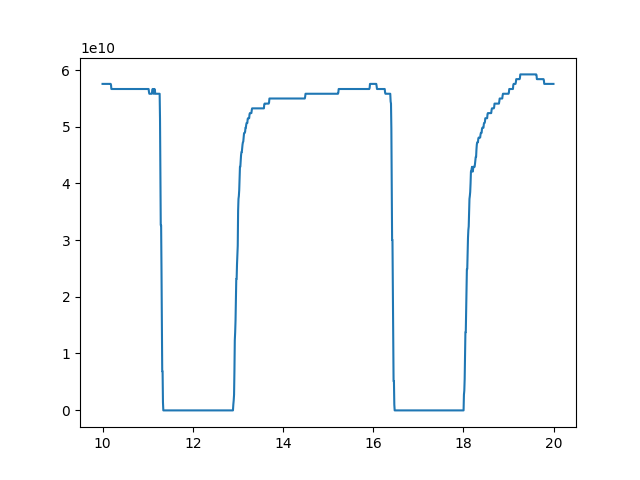

In [14]:
signal.plot_time()

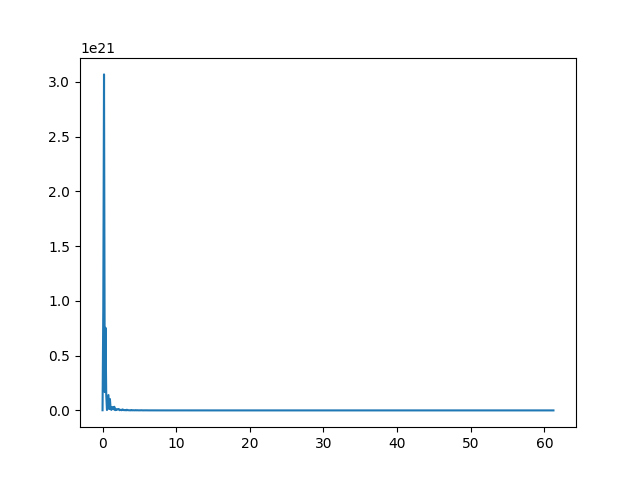

In [17]:
signal.plot_psd()

# FROM MORLET WAVELETS TO TIME-FREQUENCY AMPLITUDE MAPS

In [3]:
from tools import *

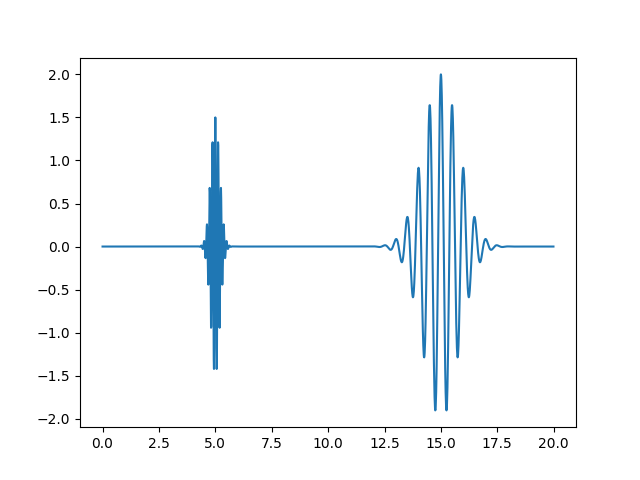

In [23]:
srate = 100
time_sig1 = np.arange(-5 , 5 , 1/srate)
freq_burst1 = 8
amplitude_burst1 = 1.5
sig1 = np.real(complex_mw(time_sig1, 10 , freq_burst1, a= amplitude_burst1, m = 0))

time_sig2 = np.arange(-5 , 5 , 1/srate)
freq_burst2 = 2
amplitude_burst1 = 2
sig2 = np.real(complex_mw(time_sig1, 10 , freq_burst2, a= amplitude_burst1, m = 0))

sig = np.concatenate([sig1, sig2], axis = 0)
time = np.arange(0 , sig.size/srate, 1 / srate)

fig, ax = plt.subplots()
ax.plot(time, sig)
plt.show()

In [24]:
f_start = 1
f_stop = 10
n_steps = 20
n_cycles = 10

amplitude_exponent = 1

In [25]:
freqs, family = morlet_family(srate, f_start = f_start, f_stop = f_stop, n_steps = n_steps, n_cycles = n_cycles)
sigs = np.tile(sig, (n_steps,1))
tf = signal.fftconvolve(sigs, family, mode = 'same', axes = 1)
power = np.abs(tf) ** amplitude_exponent

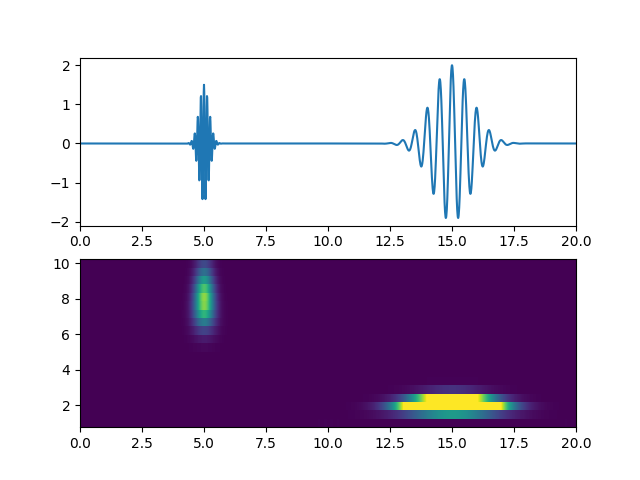

In [30]:
q = 0.015
vmin = np.quantile(power, q)
vmax = np.quantile(power, 1-q)

fig, axs = plt.subplots(nrows = 2)
ax = axs[0]
ax.plot(time, sig)
ax = axs[1]
im = ax.pcolormesh(time, freqs, power, vmin=vmin, vmax=vmax)

for ax in axs:
    ax.set_xlim(0,20)
# fig.colorbar(im, ax=ax)
plt.show()

# PANDAS ANALYSIS OF CSD

In [14]:
os.getcwd()

'/mnt/autofs/tiger/baptiste.balanca/Neuro_rea_monitorage/scripts_analyse_physio_neuro_rea'

In [15]:
data_path = '/crnldata/tiger/baptiste.balanca/Neuro_rea_monitorage/'
pd_csd = pd.read_excel(data_path + 'CSD_tronc_cerebral_python.xlsx')
print(pd_csd.head())
print(pd_csd.tail())

    ID birth_date   age electrodes_type sex injury_type                events  \
0  HA1 1963-05-14  57.0           strip   F         HSA    2021/1/2 08h37m35s   
1  HA1 1963-05-14  57.0           strip   F         HSA  2021/1/2 13h31min54s   
2  HA1 1963-05-14  57.0           strip   F         HSA    2021/1/2 14h31m41s   
3  HA1 1963-05-14  57.0           strip   F         HSA    2021/1/2 16h01m15s   
4  HA1 1963-05-14  57.0           strip   F         HSA  2021/1/2 18h14min24s   

  time_of_event_viewer time_delta end_of_event  \
0             07:22:00  1h avant      07:40:00   
1             12:31:00  1h avant      13:00:00   
2             13:31:00  1h avant      13:45:00   
3             14:30:00  1h avant      15:00:00   
4             17:14:00  1h avant      17:40:00   

                   heart_rate_variability  \
0       Baisse 7h17-7h20 puis pendant CSD   
1                            Augmentation   
2  Augmentation pendant CSD\n puis baisse   
3                Augmentation pe

In [5]:
pd_csd.info(verbose=False) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Columns: 18 entries, ID to Unnamed: 17
dtypes: datetime64[ns](1), float64(1), object(16)
memory usage: 29.2+ KB


In [6]:
pd_csd.describe()

,birth_date,age
count,207,203.000000
mean,1964-07-27 11:21:44.347826080,57.251232
min,1952-12-24 00:00:00,30.000000
25%,1961-04-21 00:00:00,55.000000
50%,1963-05-14 00:00:00,57.000000
75%,1966-06-26 00:00:00,62.500000
max,1992-03-02 00:00:00,68.000000
std,NaN,8.058016


In [7]:
pd_csd.info

<bound method DataFrame.info of        ID birth_date   age electrodes_type sex injury_type  \
0     HA1 1963-05-14  57.0           strip   F         HSA   
1     HA1 1963-05-14  57.0           strip   F         HSA   
2     HA1 1963-05-14  57.0           strip   F         HSA   
3     HA1 1963-05-14  57.0           strip   F         HSA   
4     HA1 1963-05-14  57.0           strip   F         HSA   
..    ...        ...   ...             ...  ..         ...   
202  PL20 1972-07-02  50.0           depth   F         HSA   
203  MR21 1974-11-12  48.0        depth-SD   H          TC   
204  MR21 1974-11-12  49.0        depth-SD   H          TC   
205  MR21 1974-11-12  50.0        depth-SD   H          TC   
206   P57 1959-05-05  64.0        depth-SD   F         HSA   

                                                events time_of_event_viewer  \
0                                   2021/1/2 08h37m35s             07:22:00   
1                                 2021/1/2 13h31min54s           

In [8]:
pd_csd.columns

Index(['ID', 'birth_date', 'age', 'electrodes_type', 'sex', 'injury_type',
       'events', 'time_of_event_viewer', 'time_delta', 'end_of_event',
       'heart_rate_variability', 'respiratory_rate_variability',
       'intracranial_pressure', 'arterial_blood_pressure', 'AC_signal',
       'Durée dépression', 'Durée totale dépression', 'Unnamed: 17'],
      dtype='object')

## Age and injury description 

In [9]:
pd_csd[['age']]. agg(['min', 'max', 'mean', 'median', 'std'])

,age
min,30.000000
max,68.000000
mean,57.251232
median,57.000000
std,8.058016


In [11]:
pd_csd[['time_of_event_viewer', 'end_of_event']] 

,time_of_event_viewer,end_of_event
0,07:22:00,07:40:00
1,12:31:00,13:00:00
2,13:31:00,13:45:00
3,14:30:00,15:00:00
4,17:14:00,17:40:00
...,...,...
202,12:54:00,12:57:00
203,19:15:00,19:25:00
204,17:20:00,17:26:00
205,00:45:00,??


# METRICS ANALYSIS HRV, RR VARIABILITY, RSA 

In [2]:
patient_id = 'HA1'
raw_folder = data_path / patient_id
cns_reader = CnsReader(raw_folder)

cns_reader.streams

{'SpO2': CnsStream SpO2  rate:1Hz  shape:(1005280,),
 'CPP': CnsStream CPP  rate:1Hz  shape:(1016024,),
 'ICP': CnsStream ICP  rate:123Hz  shape:(132683712,),
 'EEG_NeonatalParams': CnsStream EEG_NeonatalParams  rate:2Hz  shape:(2130785, 16),
 'EtCO2': CnsStream EtCO2  rate:1Hz  shape:(804824,),
 'ABP_Syst': CnsStream ABP_Syst  rate:1Hz  shape:(1012763,),
 'HR': CnsStream HR  rate:1Hz  shape:(1005433,),
 'ECG_II': CnsStream ECG_II  rate:497Hz  shape:(530736080,),
 'ABP': CnsStream ABP  rate:124Hz  shape:(132669540,),
 'CO2': CnsStream CO2  rate:124Hz  shape:(133133968,),
 'ABP_Mean': CnsStream ABP_Mean  rate:1Hz  shape:(1016116,),
 'EEG': CnsStream EEG  rate:256Hz  shape:(272723008, 19),
 'EEG_Impedance': CnsStream EEG_Impedance  rate:1Hz  shape:(1065321, 22),
 'Temp': CnsStream Temp  rate:1Hz  shape:(934935,),
 'ABP_Dias': CnsStream ABP_Dias  rate:1Hz  shape:(1012763,),
 'PLETH': CnsStream PLETH  rate:124Hz  shape:(132667848,),
 'ICP_Mean': CnsStream ICP_Mean  rate:1Hz  shape:(1016767

## Define Time Window : Baseline / Per_CSD / Post_CSD / 5mins_bins_after_csd

L'objectif est de définir une baseline avant que la CSD ne survienne. En prenant en compte le fait que les ECoG se situent à un endroit très focal sur le cerveau, il est possible que l'on enregistre pas en temps réel le début de la CSD. Il peut donc exister un delta temps entre ce qu'on observe sur l'iEEG et ce qu'il s'est passé juste à côté. 

per_csd_window: 5min avant - 5min après 

baseline: 15min avant la variable per_csd

post_CSD_window: 15min après? à adapter selon ce qu'on observe mais généralement on voit rapidement un arrêt des modifications une fois la dépression terminée -> à analyser sur des bins de 5 min pour être cohérent méthodologiquement

bins_after_CSD: Réaliser des bins de 5min après la fin de la CSD afin de mesurer ce qu'il se passe une fois la CSD terminée 

Ne pas oublier de caractériser les CSD / iSD / cluster 

In [3]:
num_csd = 1
start_csd = "2021-01-02T07:20:00" # Onset of SD observed on the first electrode to record it
stop_csd = "2021-01-02T07:40:00" # End of depression 

# per_window_csd: Window 5 minutes before and after CSD
window_duration = 5
start_win_before = np.datetime64(start_csd) - np.timedelta64(window_duration, 'm')
stop_win_after = np.datetime64(stop_csd) + np.timedelta64(window_duration, 'm')

# Baseline window 10-15 minutes before CSD
baseline_window = start_win_before - np.timedelta64(15, 'm')

# Window 5, 10, 15 minutes after CSD (to adjust if needed based on observations)
window_duration_after_5 = 5
after_window_5 = stop_win_after + np.timedelta64(window_duration_after_5, 'm')

window_duration_after_10 = 10
after_window_10 = stop_win_after + np.timedelta64(window_duration_after_10, 'm')

window_duration_after_15 = 15
after_window_15 = stop_win_after + np.timedelta64(window_duration_after_15, 'm')

windows = {
    'baseline': (baseline_window, start_win_before),
    'per_csd': (start_win_before, stop_win_after),
    'after_csd_5min': (stop_win_after, after_window_5),
    'after_csd_10min': (stop_win_after, after_window_10),
    'after_csd_15min': (stop_win_after, after_window_15),
    }

# Baseline 15min avant CSD 
# Fenêtre 5min avant / 5min après CSD
# Fenêtre 15min après à ajuster selon les observations 
# Réaliser bins de 5 min après CSD/iSD  
# Characterize CSD isolated, CSD in cluster, iSD

## ECG 

In [4]:
# ECG signal processing + Detect ECG R peaks 
ecg_stream = cns_reader.streams['ECG_II']
dates = ecg_stream.get_times()
ecg, r_peaks = detect_ecg_peak(ecg_stream)
r_peaks['peak_date'] = dates[r_peaks['peak_index']]

In [5]:
r_peaks.describe()

,peak_index,peak_time,peak_date
count,1.273512e+06,1.273512e+06,1273512
mean,2.627285e+08,5.281882e+05,2021-01-08 06:09:16.258394
min,2.070000e+02,4.161519e-01,2021-01-02 02:31:05.879485
25%,1.231304e+08,2.475408e+05,2021-01-05 00:00:44.333494
50%,2.652928e+08,5.333435e+05,2021-01-08 08:09:23.249818
75%,4.007245e+08,8.056150e+05,2021-01-11 11:25:49.897360
max,5.307358e+08,1.066989e+06,2021-01-14 11:41:35.506368
std,1.567094e+08,3.150479e+05,NaN


In [6]:
dates = ecg_stream.get_times()
print(dates[0], dates[-1])

2021-01-02T02:31:05.465306 2021-01-14T11:41:36.036609


In [8]:
rows_hrv = []

# Compute HRV for each time window
for label_window, (start, stop) in windows.items():
    mask = (r_peaks['peak_date'] > start) & (r_peaks['peak_date'] < stop)
    local_peaks = r_peaks[mask]
    hrv = physio.compute_ecg_metrics(local_peaks)
    row = [patient_id, num_csd, label_window, hrv]
    rows_hrv.append(row)

hrv_csd = pd.DataFrame(rows_hrv, columns=['patient', 'num_csd', 'window', 'hrv'])

hrv_csd.head()

/home/gwendan.percevault/.virtualenvs/py3.11_cluster/lib64/python3.11/site-packages/physio/ecg.py:163: RuntimeWarning: Mean of empty slice
  metrics['HRV_Mean'] = np.nanmean(delta_ms)
/home/gwendan.percevault/.virtualenvs/py3.11_cluster/lib64/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/gwendan.percevault/.virtualenvs/py3.11_cluster/lib64/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/gwendan.percevault/.virtualenvs/py3.11_cluster/lib64/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/gwendan.percevault/.virtualenvs/py3.11_cluster/lib64/python3.11/site-packages/physio/ecg.py:172: RuntimeWarning: Mean of empty slice
  metrics['HRV_RMSSD'] = np.sqrt(np.

,patient,num_csd,window,hrv
0,HA1,1,baseline,HRV_Mean 718.332989 HRV_SD ...
1,HA1,1,per_csd,HRV_Mean 938.624354 HRV_SD 1...
2,HA1,1,after_csd_5min,HRV_Mean NaN HRV_SD NaN HRV_Me...
3,HA1,1,after_csd_10min,HRV_Mean NaN HRV_SD NaN HRV_Me...
4,HA1,1,after_csd_15min,HRV_Mean NaN HRV_SD NaN HRV_Me...


In [13]:
for start, label_window in zip([start_win_before, start_win_during, start_win_after],['pre','per','post']):
    stop = start + np.timedelta64(window_duration, 'm')
    mask = (r_peaks['peak_date'] > start) & (r_peaks['peak_date'] < stop)
    local_peaks = r_peaks[mask]
    hrv = physio.compute_ecg_metrics(local_peaks)

hrv

HRV_Mean         961.724359
HRV_SD           113.927478
HRV_Median       956.948443
HRV_Mad           71.534818
HRV_CV             0.118462
HRV_MCV            0.074753
HRV_Asymmetry     -4.775916
HRV_RMSSD         80.325119
dtype: float64

In [14]:
# Instantaneous Heart Rate (IHR)
ihr = physio.compute_instantaneous_rate(local_peaks, limits=None, units='bpm', interpolation_kind='linear')


TypeError: compute_instantaneous_rate() missing 1 required positional argument: 'new_times'

## Respiratory rate variability 

In [15]:
# CO2 preprocessing
co2_stream = cns_reader.streams['CO2']
dates = co2_stream.get_times()
resp_cycles = detect_resp_cycles(co2_stream)
resp_cycles['inspi_date'] = dates[resp_cycles['inspi_index']]

In [16]:
print(resp_cycles.head(3))
print(resp_cycles.tail(3))
print(resp_cycles.shape)

   inspi_index  expi_index  next_inspi_index  inspi_time  expi_time  \
0          152         339               501    1.223943   2.729716   
1          501         684               863    4.034182   5.507745   
2          863        1041              1226    6.949100   8.382402   

   next_inspi_time  cycle_duration  inspi_duration  expi_duration  cycle_freq  \
0         4.034182        2.810238        1.505772       1.304466    0.355842   
1         6.949100        2.914918        1.473563       1.441354    0.343063   
2         9.872070        2.922970        1.433302       1.489668    0.342118   

   cycle_ratio                 inspi_date  
0     0.535817 2021-01-02 02:31:06.681833  
1     0.505525 2021-01-02 02:31:09.475043  
2     0.490358 2021-01-02 02:31:12.372299  
        inspi_index  expi_index  next_inspi_index    inspi_time     expi_time  \
318635    133132976   133133070         133133238  1.072021e+06  1.072022e+06   
318636    133133238   133133365         133133569  1

In [17]:
dates = co2_stream.get_times()
dates[0], dates[-1]

(numpy.datetime64('2021-01-02T02:31:05.465306'),
 numpy.datetime64('2021-01-14T11:41:36.030606'))

In [18]:
# Compute RR variability using physio toolbox over a time window : 
window_duration = 5 # mins

num_csd = 15
date_csd = "2021-01-02T13:25:00" # date de début de la dépolarisation de l'electrode la plus précoce

start_win_before = np.datetime64(date_csd) - np.timedelta64(window_duration, 'm')
start_win_during = np.datetime64(date_csd)
start_win_after = np.datetime64(date_csd) + np.timedelta64(window_duration, 'm')

rows_rr = []
for start, label_window in zip([start_win_before, start_win_during, start_win_after],['pre','per','post']):
    stop = start + np.timedelta64(window_duration, 'm')
    mask = (resp_cycles['inspi_date'] > start) & (resp_cycles['inspi_date'] < stop)
    local_cycles = resp_cycles[mask]

## RSA

In [ ]:
rows_rsa = []
# Define rsa_cycles

for start, label_window in zip([start_win_before, start_win_during, start_win_after], ['pre', 'per', 'post']) : 
    stop = start + np.timedelta64(window_duration, 'm')
    mask = (rsa_cycles[rsa_cycle] > start) & (rsa_cycles[rsa_cycles] < stop)
    local_rsa_cycles = rsa_cycles[mask]
    




def compute_rsa(resp_cycles, ecg_peaks, srate=100., units='bpm', limits=None, two_segment=True, points_per_cycle=50):

# ABP
Définir ABP médiane 

Définir PP 

% de variation de la PAM et PIC à définir en % afin de normaliser les observations 

% de variation en fonction de la respi -> Définir spectre

# PIC 
Définir PIC médiane 